In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x

rr = np.arange(12, 18, 1)
ee = [0,1,2,3,4,5,6,7,8,9,10]


rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

# directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
# path_sp_1 = f'{directory_1}N_atom000E+00_Vexp000E+00_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'

# data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
# sp_dlam_1 = data_sp_1[0]
# yy_g= data_sp_1[1]
# # # plt.plot(data_sp_1[0],data_sp_1[1])

# nu_space = (cc / (sp_dlam_1 * 1e-8))
# del_V_space_g = (sp_dlam_1 *1e-8/ C_IV_K - 1) * cc / 1e5  # km/s

# Del_V_H = (C_IV_H/ C_IV_K - 1)* cc / 1e5 

# print(Del_V_H)


def gauss_func(F_c,x,x_0,sig):
    xx = np.linspace(x.min(),x.max(),1000)
    ss = (xx-x_0)/sig
    ex = np.zeros(len(xx))
    ex = F_c*np.exp(-ss**2/2)
    return  xx,ex

# plt.plot(del_V_space_g,yy_g)

3.39e+13


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.constants import c
import astropy.units as u

# 데이터 및 상수 설정
rr = np.arange(13, 18, 1)
atom = [13,20,32,50,79]
ee = np.arange(-1000,1100,100)
rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * ee / 10
total_N_c = total_N_c.flatten()

C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm
C_IV_K_wo = 1548.187  # cm
C_IV_H_wo = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s



K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952

nu_C_IV_K = cc / C_IV_K  # s-1
nu_C_IV_H = cc / C_IV_H  # s-1

xx_1 = np.zeros(len(rr) * len(ee))
scat_1 = np.zeros(len(rr) * len(ee))

directory_1 = '~/RT/C_IV/code_tes/data_C_IV_out/'
check = 0
for ii, index in enumerate(rr):
    for jj, expand in enumerate(ee):
        if expand ==0:
            expand_v = '000'
            num_e = 0
        elif abs(expand) == 1000 :
            expand_v = int(expand / 10) 
            num_e = 3
        else :
            expand_v = expand 
            num_e = 2
        for kk,atom_n in enumerate(atom):
            path_sp_1 = f'{directory_1}N_atom{atom_n}0E+{index}_Vexp{expand_v}E+0{num_e}_Vemit500E+01_tauD000E+00_Vran118E+01spec_com.dat'
        # 데이터 읽기
            try:
                data_sp_1 = pd.read_csv(path_sp_1, sep='\s+', header=None)
            except FileNotFoundError:
                print(f"파일을 찾을 수 없습니다: {path_sp_1}")
                check += 1
                continue

            sp_dlam_1 = data_sp_1[0].to_numpy()
            sp_1 = data_sp_1[1].to_numpy()

            indices_K_1 = np.where(sp_dlam_1 <= 1550)[0]
            indices_H_1 = np.where(sp_dlam_1 > 1550)[0]

            sp_dlam_K = sp_dlam_1[indices_K_1]
            sp_dlam_H = sp_dlam_1[indices_H_1]

            dlam_k = sp_dlam_K[1]-sp_dlam_K[0]
            dlam_h = sp_dlam_H[1]-sp_dlam_H[0]
            dlam_sp =sp_dlam_1[1] -sp_dlam_1[0]
            # print(dlam_k ,dlam_h,dlam_sp)

            sp_K = sp_1[indices_K_1]
            sp_H = sp_1[indices_H_1]

            if len(sp_K) == 0 or len(sp_H) == 0:
                print(f"데이터 부족: {path_sp_1}")
                continue

            # p_1 = np.argmax(sp_K)
            # K_line_peak_lam = sp_dlam_K[p_1]
            # K_line_peak_flux = sp_K[p_1]

            # p_2 = np.argmax(sp_H)
            # H_line_peak_lam = sp_dlam_H[p_2]
            # H_line_peak_flux = sp_H[p_2]

            nu_space = (cc / (sp_dlam_1 * 1e-8))
            del_V_space = (nu_C_IV_K / nu_space - 1) * cc / 1e5  # km/s


            indices_K_V = np.where((del_V_space<100)& (del_V_space>-100))[0]
            indices_H_V = np.where((del_V_space<600)& (del_V_space>400))[0]

            sp_V_K = del_V_space[indices_K_V]
            sp_V_H = del_V_space[indices_H_V]

            sp_K_f = sp_1[indices_K_V]
            sp_H_f = sp_1[indices_H_V] 

            KK = np.argmax(sp_K_f)
            HH = np.argmax(sp_H_f)
            K_line_peak_flux = sp_K_f[KK]
            H_line_peak_flux = sp_H_f[HH]



            pp_1 = np.where(sp_1 == K_line_peak_flux)[0]
            pp_1 = pp_1[0] if pp_1.size > 0 else None
            pp_2 = np.where(sp_1 == H_line_peak_flux)[0]
            pp_2 = pp_2[-1] if pp_2.size > 0 else None

            peak_K_V, peak_K_flux = del_V_space[pp_1], sp_1[pp_1]
            peak_H_V, peak_H_flux = del_V_space[pp_2], sp_1[pp_2]


            del_V_space_K = (peak_K_V/ sp_V_K - 1) * cc / 1e5  # km/s
            del_V_space_H = (peak_H_V/ nu_space - 1) * cc / 1e5  # km/s


            globals()[f'K_dv_{atom_n}_{index}_{expand}'] = del_V_space_K

            globals()[f'K_f_{atom_n}_{index}_{expand}'] =sp_K_f




            globals()[f'H_dv_{atom_n}_{index}_{expand}'] = del_V_space_H
            globals()[f'H_f_{atom_n}_{index}_{expand}'] = sp_H_f

            sep_point = abs(peak_H_V - peak_K_V) / 2

            indices_K_sp = np.where(del_V_space <= sep_point)[0]
            indices_H_sp = np.where(del_V_space > sep_point)[0]

            int_Vel_K = del_V_space[indices_K_sp]
            int_Vel_H = del_V_space[indices_H_sp]

            int_flux_K = sp_1[indices_K_sp]
            int_flux_H = sp_1[indices_H_sp]


            H_nu = (C_IV_H/C_IV_K -1 )*cc/1e5

            dh = peak_H_V - H_nu  
            globals()[f'I_K_dv_{atom_n}_{index}_{expand}'] = int_Vel_K 
            globals()[f'I_K_f_{atom_n}_{index}_{expand}'] = int_flux_K

            globals()[f'I_H_dv_{atom_n}_{index}_{expand}'] = int_Vel_H  
            globals()[f'I_H_f_{atom_n}_{index}_{expand}'] = int_flux_H         
print(check)  

0


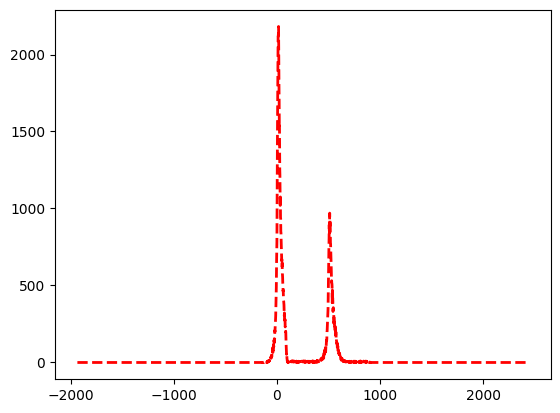

In [4]:
atom_n = 50
index = 15
expand = 400
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] ,'r--',lw=2,label=f'{index}')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] ,'r--',lw=2)

Text(770, 2.5, '$\\rm V_{\\rm exp} = 400\\,\\rm km\\,s^{-1}$')

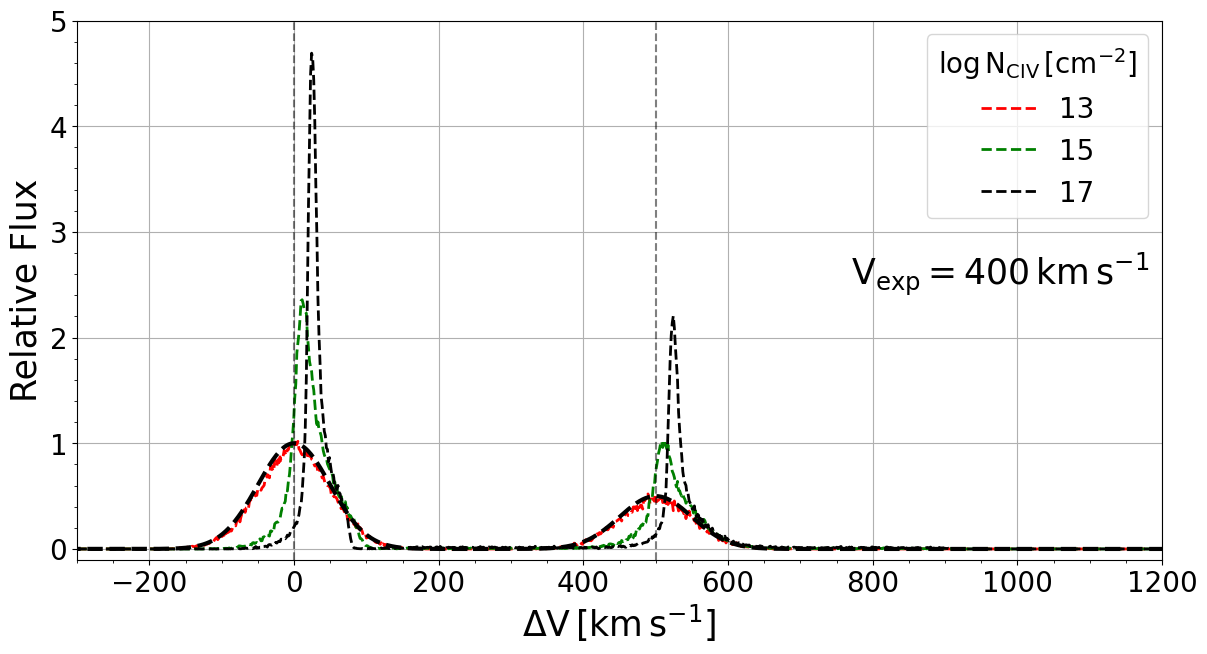

In [5]:
fig = plt.figure(1,figsize=(14,7))



atom_n = 32
index = 13

dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
expand = 0
normal_f = globals()[f'I_K_f_{atom_n}_{index}_{expand}'].max() 

expand = 400


index= 13
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'r--',lw=2,label=f'{index}')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] / normal_f ,'r--',lw=2)

xx_k,int_gau_K= gauss_func(normal_f,globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],0,50)
xx_h,int_gau_H= gauss_func(normal_f,globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],500,50)

# nn = globals()[f'I_K_f_{focus_exp}_13']
# index = 14
# plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}']/normal_f ,'b--',lw=2,label=f'{index }')
# plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}']/normal_f ,'b--',lw=2)

index = 15
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'g--',lw=2,label=f'{index }')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}']/normal_f  ,'g--',lw=2)

# index = 16
# plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'m--',lw=2,label=f'{index }')
# plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] / normal_f ,'m--',lw=2)

index = 17
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'k--',lw=2,label=f'{index }')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}']/normal_f  ,'k--',lw=2)
# plt.plot(del_V_space_g,yy_g / normal_f,'k--',lw=2,alpha=1)

plt.plot(xx_k,int_gau_K/normal_f,'k--',lw=3)
plt.plot(xx_h,int_gau_H/normal_f/2,'k--',lw=3)

plt.xlim(-300, 1200)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,ncol=1,title=r'$\log{{\rm N}_{\rm C IV}}\,[\rm cm ^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
ymin = -0.1
ymax = 5
plt.ylim(ymin,ymax)
plt.text(770, ymax*(0.5), f'$\\rm V_{{\\rm exp}} = {expand}\\,\\rm km\\,s^{{-1}}$', size=25, fontweight='bold')
#400 -> 2.1
#500 -> 0.97

# plt.savefig(f'/home/jin/바탕화면/DelV_gauss_source_density_{expand}km.pdf',bbox_inches='tight')

Text(770, 1.25, '$\\rm V_{\\rm exp} = 500\\,\\rm km\\,s^{-1}$')

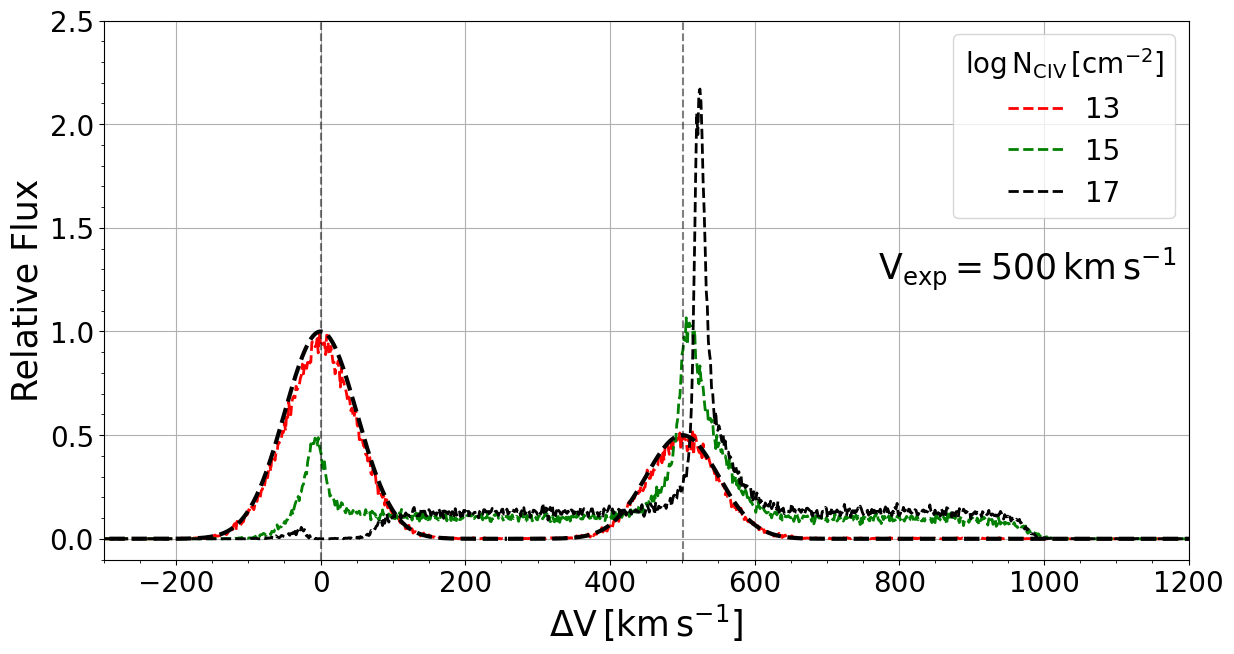

In [6]:
fig = plt.figure(1,figsize=(14,7))



atom_n = 32
index = 13

dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
expand = 0
normal_f = globals()[f'I_K_f_{atom_n}_{index}_{expand}'].max() 

expand = 500


index= 13
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'r--',lw=2,label=f'{index}')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] / normal_f ,'r--',lw=2)

xx_k,int_gau_K= gauss_func(normal_f,globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],0,50)
xx_h,int_gau_H= gauss_func(normal_f,globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],500,50)

# nn = globals()[f'I_K_f_{focus_exp}_13']
# index = 14
# plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}']/normal_f ,'b--',lw=2,label=f'{index }')
# plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}']/normal_f ,'b--',lw=2)

index = 15
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'g--',lw=2,label=f'{index }')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}']/normal_f  ,'g--',lw=2)

# index = 16
# plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'m--',lw=2,label=f'{index }')
# plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] / normal_f ,'m--',lw=2)

index = 17
plt.plot(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'] / normal_f ,'k--',lw=2,label=f'{index }')
plt.plot(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'] / normal_f ,'k--',lw=2)

# plt.plot(del_V_space_g,yy_g / normal_f,'k--',lw=2,alpha=1)

plt.plot(xx_k,int_gau_K/normal_f,'k--',lw=3)
plt.plot(xx_h,int_gau_H/normal_f/2,'k--',lw=3)

plt.xlim(-300, 1200)
plt.minorticks_on()
plt.grid(True)
plt.legend(loc='upper right',fontsize=20,title=r'$\log{{\rm N}_{\rm C IV}}\,[\rm cm ^{-2}]$',title_fontsize=20)
plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
plt.ylabel(r'Relative Flux',fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle='--',alpha=0.5)
ymin = -0.1 
ymax = 2.5
plt.ylim(ymin ,ymax)
plt.text(770, ymax*(0.5), f'$\\rm V_{{\\rm exp}} = {expand}\\,\\rm km\\,s^{{-1}}$', size=25, fontweight='bold')
#400 -> 2.1
#500 -> 0.97

# plt.savefig(f'/home/jin/바탕화면/DelV_gauss_source_density_{expand}km.pdf',bbox_inches='tight')

In [7]:
k = cc/1e5

lamm = 1548*(1+ 2*500/ k)
lamm 


np.float64(1553.1635721936675)

In [8]:
# fig = plt.figure(1,figsize=(20,7))

# focus_col = 15
# n_1 = 1

# normal_f = globals()[f'I_K_f_{n_1}_{focus_col}'].max() 

# # n_1 = 1
# plt.plot(globals()[f'I_K_dv_{n_1}_{focus_col}'],globals()[f'I_K_f_{n_1}_{focus_col}']/normal_f,'r--',lw=2,label=f'{n_1}00')
# plt.plot(globals()[f'I_H_dv_{n_1}_{focus_col}'],globals()[f'I_H_f_{n_1}_{focus_col}']/normal_f,'r--',lw=2)

# n_2 = 4
# plt.plot(globals()[f'I_K_dv_{n_2}_{focus_col}'],globals()[f'I_K_f_{n_2}_{focus_col}']/normal_f,'b--',lw=2,label=f'{n_2}00')
# plt.plot(globals()[f'I_H_dv_{n_2}_{focus_col}'],globals()[f'I_H_f_{n_2}_{focus_col}']/normal_f,'b--',lw=2)

# n_3 = 7
# plt.plot(globals()[f'I_K_dv_{n_3}_{focus_col}'],globals()[f'I_K_f_{n_3}_{focus_col}']/normal_f,'g--',lw=2,label=f'{n_3}00')
# plt.plot(globals()[f'I_H_dv_{n_3}_{focus_col}'],globals()[f'I_H_f_{n_3}_{focus_col}']/normal_f,'g--',lw=2)

# n_4 = 9
# plt.plot(globals()[f'I_K_dv_{n_4}_{focus_col}'],globals()[f'I_K_f_{n_4}_{focus_col}']/normal_f,'m--',lw=2,label=f'{n_4}00')
# plt.plot(globals()[f'I_H_dv_{n_4}_{focus_col}'],globals()[f'I_H_f_{n_4}_{focus_col}']/normal_f,'m--',lw=2)



# # plt.plot(del_V_space_g,yy_g / normal_f,'k--',lw=2,alpha=1)
# plt.plot(xx_k,int_gau_K/normal_f,'k--',lw=3)
# plt.plot(xx_h,int_gau_H/normal_f/2,'k--',lw=3)


# plt.axvline(x=0,ymin=0,ymax=5,color='k',linestyle=':')
# dnu = (nu_C_IV_K/nu_C_IV_H -1)*cc/1e5
# plt.axvline(x=dnu,ymin=0,ymax=5,color='k',linestyle=':')


# plt.xlim(-300, 1000)
# plt.minorticks_on()
# plt.grid(True)
# plt.legend(loc='upper right',fontsize=25,ncol=2,title=r'$\rm V_{\rm exp} \, [\rm km \, s^{-1}]$',title_fontsize=25)
# plt.xlabel(r'$\Delta \rm V \, [\rm km\,s^{-1}]$',fontsize=25)
# plt.ylabel(r'Relative Flux',fontsize=25)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)




# # plt.savefig('/home/jin/바탕화면/DelV_15_gauss_source_Vexp.pdf',bbox_inches='tight')


([<matplotlib.axis.YTick at 0x757999701090>,
 [Text(0, 0.1, '$\\mathdefault{10^{-1}}$'),
  Text(0, 1.0, '$\\mathdefault{10^{0}}$'),
  Text(0, 10.0, '$\\mathdefault{10^{1}}$')])

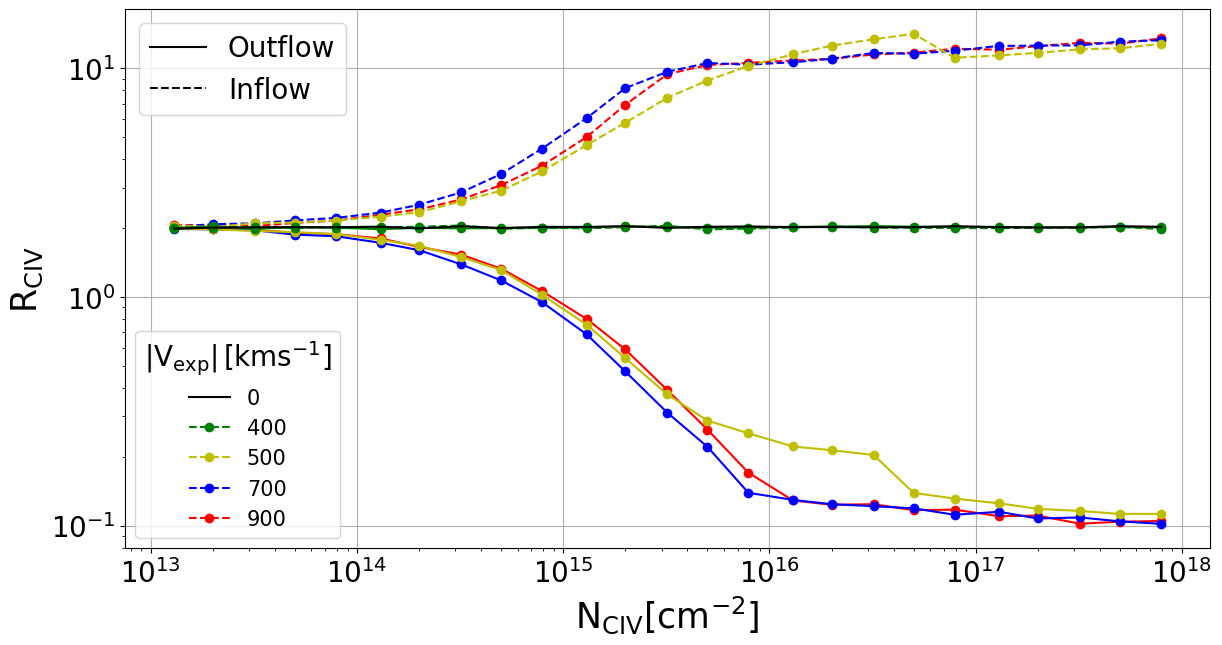

In [10]:
import math
rr = np.arange(13, 18, 1)
atom = [13,20,32,50,79]
ee = np.arange(-1000,1100,100)
rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * atom / 10
total_N_c = total_N_c.flatten()



def inf(x,y):
    summ = np.zeros(len(y))
    dx = x[1]- x[0]
    summ = np.sum(dx*y,axis=0)
    return summ

ratio = np.zeros((len(ee),len(total_N_c)))

for ii,expand in enumerate(ee):
    for jj, N_civ in enumerate(total_N_c):
            index = math.floor(math.log10(N_civ))
            atom_n = int(N_civ/ 10**index * 10)

            a_1 = inf(globals()[f'I_K_dv_{atom_n}_{index}_{expand}'],globals()[f'I_K_f_{atom_n}_{index}_{expand}'])
            a_2 = inf(globals()[f'I_H_dv_{atom_n}_{index}_{expand}'],globals()[f'I_H_f_{atom_n}_{index}_{expand}'])
            ratio[ii][jj] = a_1/ a_2

fig = plt.figure(1,figsize=(14,7))
from matplotlib.ticker import ScalarFormatter
# for ii, jj in enumerate(ee):



# plt.plot(10**(rr), ratio[0][:], 'ro--',alpha=1,label='1000')
# plt.plot(10**(rr),ratio[-1][:],'ro-', alpha=1)

plt.plot(total_N_c, ratio[1][:], 'ro--',alpha=1,label='900')
plt.plot(total_N_c,ratio[-2][:],'ro-', alpha=1)

plt.plot(total_N_c, ratio[3][:], 'bo--', alpha=1,label='700')
plt.plot(total_N_c,ratio[-4][:],'bo-',alpha=1)


plt.plot(total_N_c, ratio[5][:], 'yo--', alpha=1,label='500')
plt.plot(total_N_c,ratio[-6][:],'yo-',alpha=1)


plt.plot(total_N_c, ratio[8][:], 'go--',label='400')
plt.plot(total_N_c,ratio[-9][:],'go-')

plt.plot(total_N_c, ratio[11][:], 'k-',label='0')
# plt.plot(10**(rr),ratio[-10][:],'bo--', markerfacecolor='none',alpha=0.8)

handles, labels = plt.gca().get_legend_handles_labels()
ff_t = plt.legend(handles[::-1], labels[::-1], loc='lower left', title='$| \mathrm{V}_\mathrm{exp}|\,[\mathrm{km s^{-1}}]$', title_fontsize=20, fontsize=15)



# Add the first legend back to the plot
plt.gca().add_artist(ff_t )

import matplotlib.lines as mlines
outflow_line = mlines.Line2D([], [], color='black', linestyle='-', label='Outflow')
inflow_line = mlines.Line2D([], [], color='black', linestyle='--', label='Inflow')

# Add a second legend
second_legend = plt.legend(handles=[outflow_line, inflow_line], loc='upper left', fontsize=20)



plt.xscale('log')
plt.xlabel(r'${\rm N}_{\rm C IV} [\rm cm^{-2}]$',fontsize=25)
plt.ylabel(r'${\rm R}_{\rm C IV} $',fontsize=25)
plt.xticks(fontsize=20)
# plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# plt.legend('-')


plt.grid(True)
plt.yscale('log')
plt.yticks([0.1, 1, 10], fontsize=20)

# plt.savefig('/home/jin/바탕화면/DelV_gauss_source_ratio.pdf',bbox_inches='tight')